<a href="https://colab.research.google.com/github/RamyCodes/EDA_milestone1/blob/main/EDA_milestone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

# First , Exploring our dataset

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Make a directory named kaggle and copy the kaggle.json file there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d bartoszpieniak/poland-cars-for-sale-dataset

 90% 16.0M/17.7M [00:00<00:00, 26.8MB/s]
100% 17.7M/17.7M [00:01<00:00, 17.8MB/s]


In [ ]:
from zipfile import ZipFile
file_name = 'poland-cars-for-sale-dataset.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
data = pd.read_csv('/content/Car_sale_ads.csv')

In [ ]:
#Print first 5 rows of data
data.head()

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


In [ ]:
data.count()
# Gets the number of all values in each column

Index                      58857
Price                      58857
Currency                   58857
Condition                  58857
Vehicle_brand              58857
Vehicle_model              58857
Vehicle_version            39679
Vehicle_generation         41442
Production_year            58857
Mileage_km                 58464
Power_HP                   58659
Displacement_cm3           58296
Fuel_type                  58857
CO2_emissions              27595
Drive                      54643
Transmission               58689
Type                       58856
Doors_number               58416
Colour                     58856
Origin_country             31773
First_owner                15863
First_registration_date    22473
Offer_publication_date     58856
Offer_location             58856
Features                   58856
dtype: int64

In [ ]:
data.dtypes
# gets the data type of each column(attribute)

Index                        int64
Price                        int64
Currency                    object
Condition                   object
Vehicle_brand               object
Vehicle_model               object
Vehicle_version             object
Vehicle_generation          object
Production_year              int64
Mileage_km                 float64
Power_HP                   float64
Displacement_cm3           float64
Fuel_type                   object
CO2_emissions              float64
Drive                       object
Transmission                object
Type                        object
Doors_number               float64
Colour                      object
Origin_country              object
First_owner                 object
First_registration_date     object
Offer_publication_date      object
Offer_location              object
Features                    object
dtype: object

In [ ]:
data.describe()
# returns some statistical information about the numerical attributes in our dataset

,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,CO2_emissions,Doors_number
count,208304.000000,2.083040e+05,208304.000000,2.073210e+05,207661.000000,206338.000000,9.404700e+04,206817.000000
mean,104151.500000,6.305383e+04,2012.098241,1.502768e+05,151.836281,1882.567147,3.191564e+05,4.637138
std,60132.329574,8.665967e+04,6.998414,2.937447e+06,77.683546,729.609660,7.291396e+07,0.768559
min,0.000000,5.000000e+02,1915.000000,1.000000e+00,1.000000,400.000000,1.000000e+00,1.000000
25%,52075.750000,1.780000e+04,2008.000000,5.300000e+04,105.000000,1461.000000,1.200000e+02,5.000000
50%,104151.500000,3.570000e+04,2013.000000,1.445660e+05,136.000000,1798.000000,1.400000e+02,5.000000
75%,156227.250000,7.599000e+04,2017.000000,2.060000e+05,172.000000,1997.000000,1.640000e+02,5.000000
max,208303.000000,6.999000e+06,2021.000000,1.111111e+09,1398.000000,8400.000000,2.000000e+10,55.000000


In [ ]:
data.shape
# gets the number of rows and columns in the dataset

(208304, 25)

In [ ]:
data.info()
# counts the number of (missing cells) in each column , but doesnt show to us the true number of missing values 
# It results in No missing cells , All cells are filled 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208304 entries, 0 to 208303
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    208304 non-null  int64  
 1   Price                    208304 non-null  int64  
 2   Currency                 208304 non-null  object 
 3   Condition                208304 non-null  object 
 4   Vehicle_brand            208304 non-null  object 
 5   Vehicle_model            208304 non-null  object 
 6   Vehicle_version          138082 non-null  object 
 7   Vehicle_generation       147860 non-null  object 
 8   Production_year          208304 non-null  int64  
 9   Mileage_km               207321 non-null  float64
 10  Power_HP                 207661 non-null  float64
 11  Displacement_cm3         206338 non-null  float64
 12  Fuel_type                208304 non-null  object 
 13  CO2_emissions            94047 non-null   float64
 14  Driv

# Cleaning our data:Checking the missing values and dropping the unnecessary columns

In [ ]:
missing_data = pd.read_csv('/content/Car_sale_ads.csv' ,na_values=['?'])
missing_data.head()

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


In [ ]:
null_values = data.isnull().sum() # gets the number of null values for each column
null_values

Index                          0
Price                          0
Currency                       0
Condition                      0
Vehicle_brand                  0
Vehicle_model                  0
Vehicle_version            19178
Vehicle_generation         17415
Production_year                0
Mileage_km                   393
Power_HP                     198
Displacement_cm3             561
Fuel_type                      0
CO2_emissions              31262
Drive                       4214
Transmission                 168
Type                           1
Doors_number                 441
Colour                         1
Origin_country             27084
First_owner                42994
First_registration_date    36384
Offer_publication_date         1
Offer_location                 1
Features                       1
dtype: int64

In [ ]:
percent_missing = null_values * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
missing_value_df
# len(data) is number of rows

,column_name,percent_missing
Index,Index,0.000000
Price,Price,0.000000
Currency,Currency,0.000000
Condition,Condition,0.000000
Vehicle_brand,Vehicle_brand,0.000000
Vehicle_model,Vehicle_model,0.000000
Vehicle_version,Vehicle_version,32.584060
Vehicle_generation,Vehicle_generation,29.588664
Production_year,Production_year,0.000000
Mileage_km,Mileage_km,0.667720


In [ ]:
# Drop the columns where missing values is greater or equal to 30%
df_clean = data.drop(['Vehicle_version', 'Vehicle_generation','CO2_emissions','Origin_country','First_owner','First_registration_date'], axis=1)

# Removing the remaining missing values by using the appropriate imputation technique

In [ ]:
null_values = df_clean.isnull().sum()
null_values

Index                        0
Price                        0
Currency                     0
Condition                    0
Vehicle_brand                0
Vehicle_model                0
Production_year              0
Mileage_km                 393
Power_HP                   198
Displacement_cm3           561
Fuel_type                    0
Drive                     4214
Transmission               168
Type                         1
Doors_number               441
Colour                       1
Offer_publication_date       1
Offer_location               1
Features                     1
dtype: int64

In [ ]:
df_clean['Transmission']=df_clean['Transmission'].fillna(df_clean['Transmission'].mode()[0])
df_clean['Drive']=df_clean['Drive'].fillna(df_clean['Drive'].mode()[0])
df_clean['Mileage_km']=df_clean['Mileage_km'].fillna(df_clean['Mileage_km'].mean())
df_clean['Power_HP']=df_clean['Power_HP'].fillna(df_clean['Power_HP'].mean())
df_clean['Displacement_cm3']=df_clean['Displacement_cm3'].fillna(df_clean['Displacement_cm3'].mean())
df_clean['Doors_number']=df_clean['Doors_number'].fillna(df_clean['Doors_number'].mode()[0])
# we replaced with the mean when it had sense to do that but for a column like transmission which has binary values 
# we subistitute with the mode

In [ ]:
null_values = df_clean.isnull().sum()
null_values

Index                     0
Price                     0
Currency                  0
Condition                 0
Vehicle_brand             0
Vehicle_model             0
Production_year           0
Mileage_km                0
Power_HP                  0
Displacement_cm3          0
Fuel_type                 0
Drive                     0
Transmission              0
Type                      1
Doors_number              0
Colour                    1
Offer_publication_date    1
Offer_location            1
Features                  1
dtype: int64

In [ ]:
unique = df_clean.nunique()
print(unique)
# doesnt count the duplicated values

Index                     58857
Price                      7074
Currency                      2
Condition                     2
Vehicle_brand                31
Vehicle_model               404
Production_year              81
Mileage_km                16566
Power_HP                    475
Displacement_cm3            601
Fuel_type                     6
Drive                         5
Transmission                  2
Type                          9
Doors_number                  7
Colour                       14
Offer_publication_date       35
Offer_location             8482
Features                  50290
dtype: int64


In [ ]:
data['Currency'].value_counts() 
# returns counts of unique values

PLN    58782
EUR       75
Name: Currency, dtype: int64

**We realize that the currency polish currency is mostly used , so we need to unite the currency used so we will convert all the euro currency to polish based on 2021 standings , Since that 1 euro = 4.68 polish ** ***italicized text***

In [ ]:
data[(data['Currency'] == 'EUR')]['Price'] = data[(data['Currency'] == 'EUR')]['Price'] * 4.68

<ipython-input-34-1e727456b705>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[(data['Currency'] == 'EUR')]['Price'] = data[(data['Currency'] == 'EUR')]['Price'] * 4.68


**Now all the prices in EUR have been changed to polish we will check that :** 

In [ ]:
data['Currency'] = 'PLN'
data['Currency'].value_counts()

PLN    58857
Name: Currency, dtype: int64

In [ ]:
df_clean['Transmission'].value_counts()
# more manual cars here

Manual       32022
Automatic    26835
Name: Transmission, dtype: int64

In [ ]:
df_clean['Drive'].value_counts()

Front wheels                    34207
Rear wheels                      9740
4x4 (permanent)                  9369
4x4 (attached automatically)     5273
4x4 (attached manually)           268
Name: Drive, dtype: int64

**We try to find any outliers in our dataset columns and handle it**

In [ ]:
df_clean.head()

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,1974,59000.0,75.0,1100.0,Gasoline,Front wheels,Manual,coupe,2.0,silver,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,Front wheels,Automatic,small_cars,3.0,silver,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,gray,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,Front wheels,Manual,small_cars,3.0,blue,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


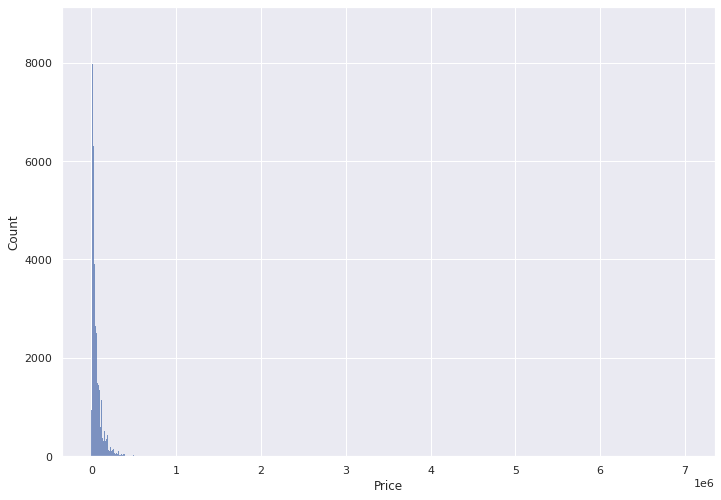

In [ ]:
sns.histplot(df_clean['Price']) 
# we see that the max value is an outlier

In [ ]:
df_clean = df_clean.drop(df_clean[df_clean.Price >= 4000].index)
# we remove outliers in price

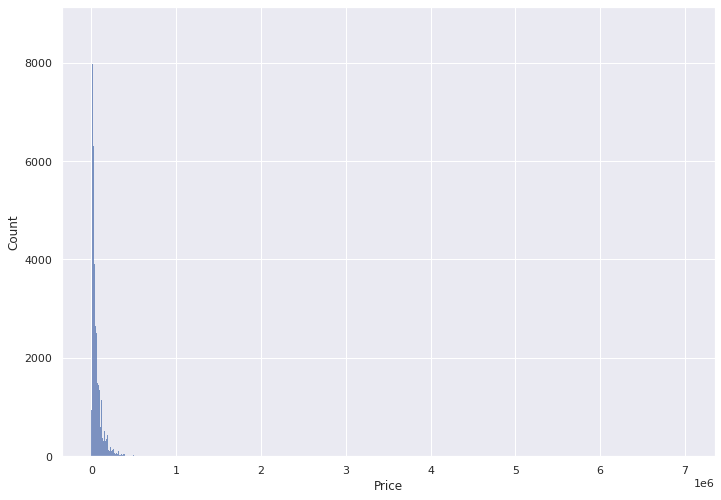

In [ ]:
sns.histplot(df_clean['Price']) 

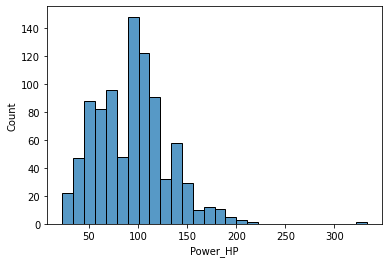

In [ ]:
# now we will see the values of the horse powe
sns.histplot(df_clean['Power_HP'])

In [ ]:
df_clean = df_clean.drop(df_clean[df_clean.Power_HP > 120].index)
#  we remove outliers in horse power

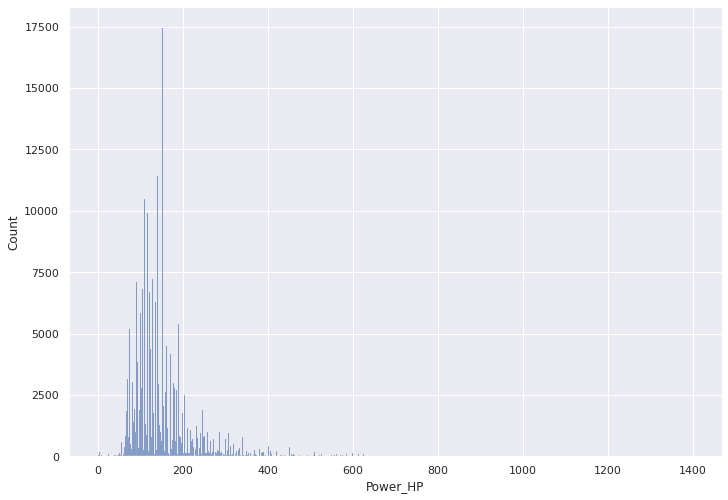

In [ ]:
sns.histplot(df_clean['Power_HP'])

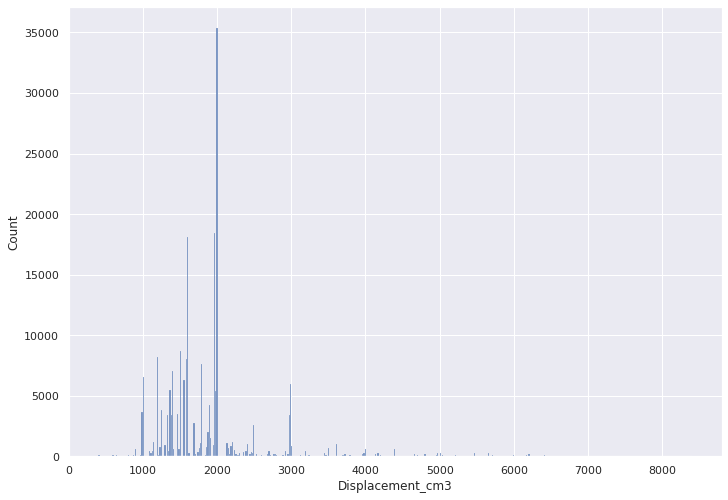

In [ ]:
sns.histplot(df_clean['Displacement_cm3'])


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


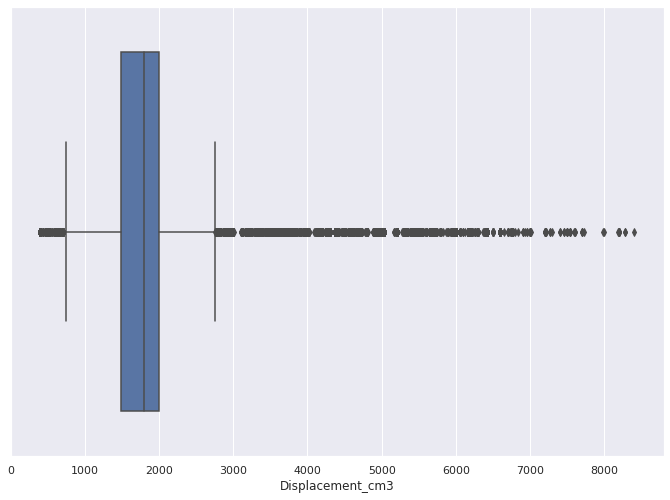

In [ ]:
sns.boxplot(df_clean['Displacement_cm3'])

# Applying univariate data analysis using countplot on features that contain small number of unique values


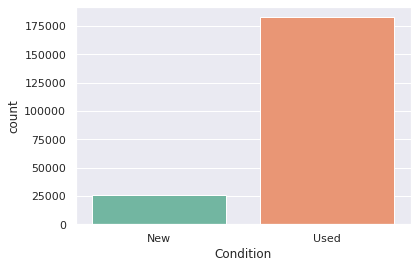

In [ ]:
#This plot shows that we are dealing with mostly used cars in our dataset
sns.set(style="darkgrid")
condition_count = sns.countplot(x="Condition", data=df_clean, palette="Set2")

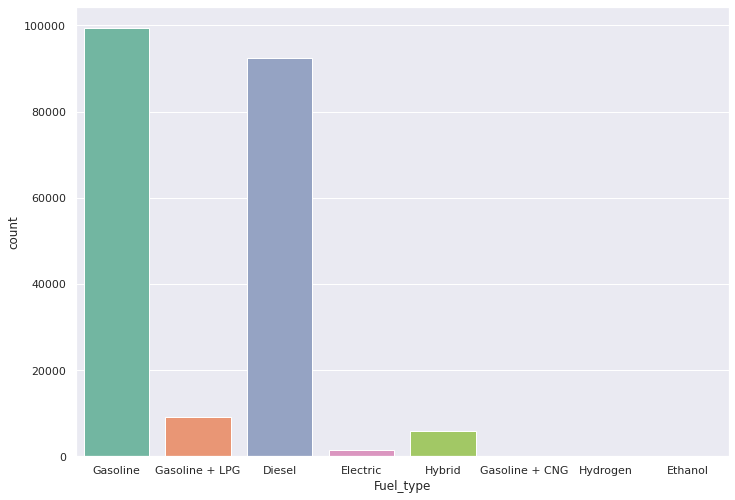

In [ ]:
#Most of the fuel_type used by these cars is Gasoline and Disel fuel
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="darkgrid")
Fuel_type_count = sns.countplot(x="Fuel_type", data=df_clean, palette="Set2")

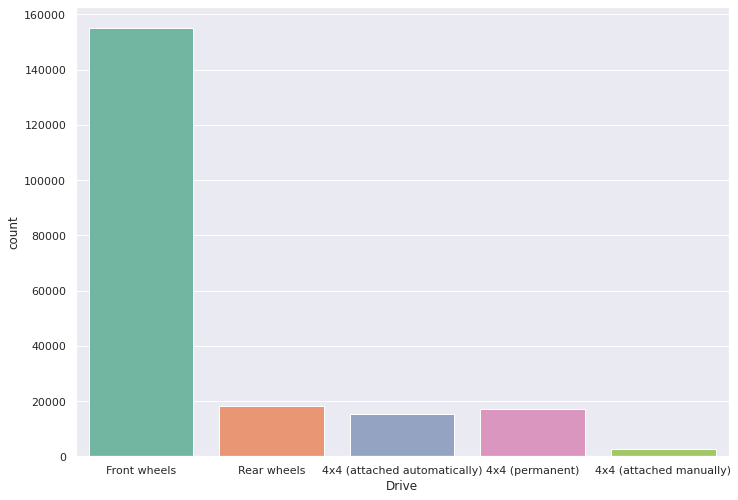

In [ ]:
#Most of the cars use Front wheels Drive
sns.set(style="darkgrid")
Drive_count = sns.countplot(x="Drive", data=df_clean, palette="Set2")

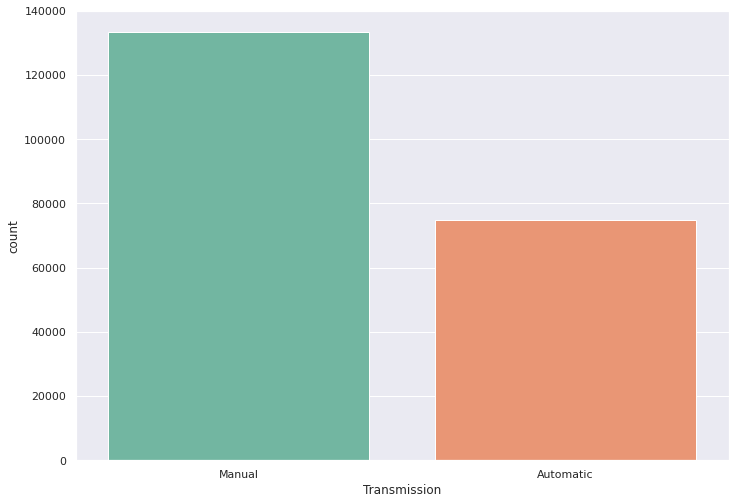

In [ ]:
#about half of our cars are manual cars
sns.set(style="darkgrid")
Transmission_count = sns.countplot(x="Transmission", data=df_clean, palette="Set2")

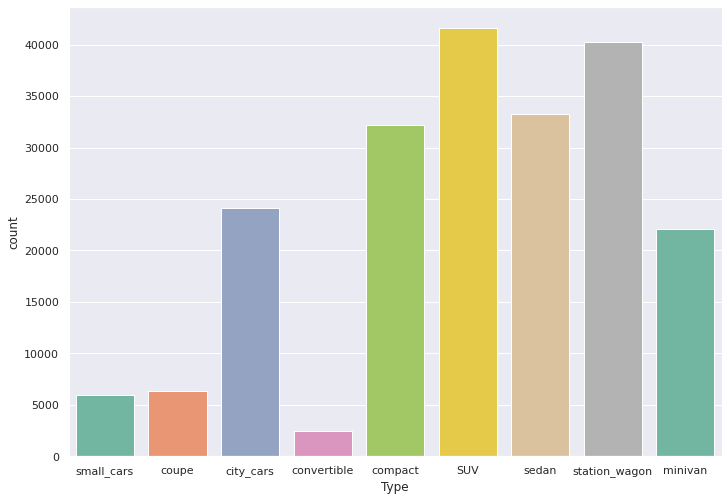

In [ ]:
#For the car type, unlike the other features we have here a large variety of car types
sns.set(style="darkgrid")
Type_count = sns.countplot(x="Type", data=df_clean, palette="Set2")

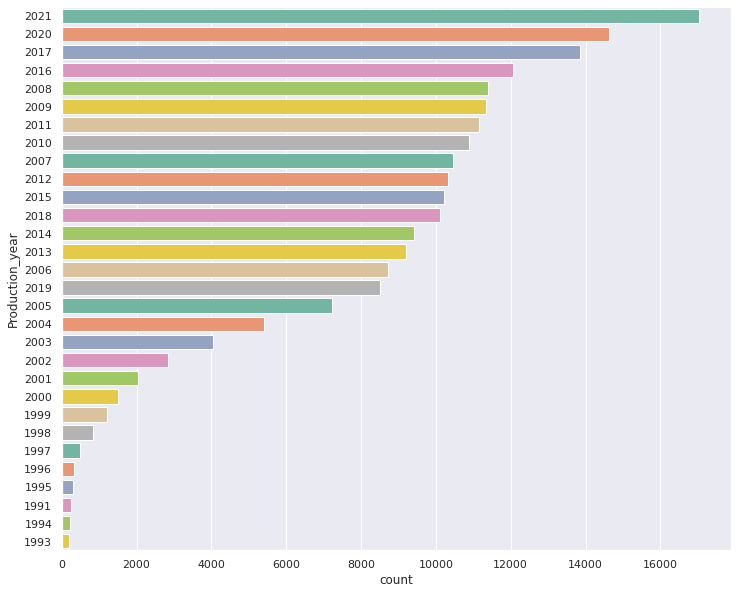

In [ ]:
#Most of the cars in our dataset are modern
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
Production_year_count = sns.countplot(y="Production_year", data=df_clean, palette="Set2", order=df_clean['Production_year'].value_counts().index[0:30])

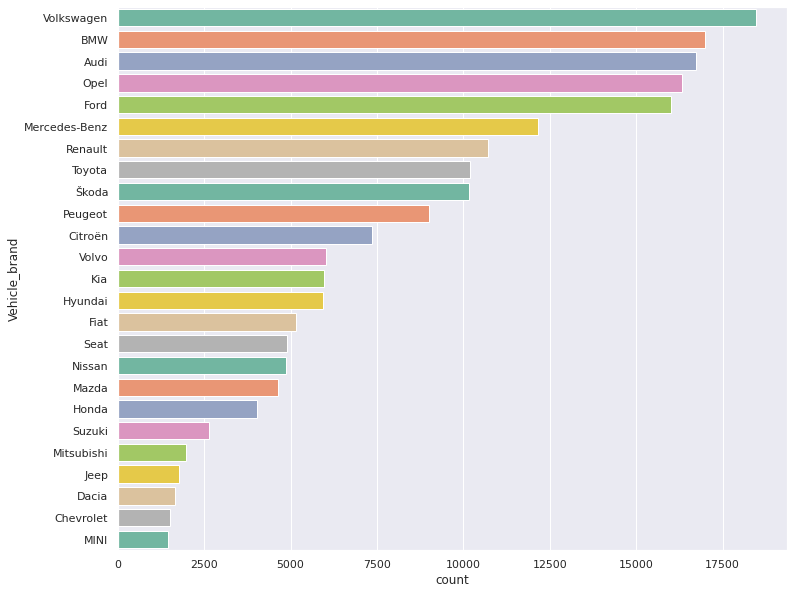

In [ ]:
#Here we have a variety of car brand most of which are Volkswagen cars
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
Vehicle_brand_count = sns.countplot(y="Vehicle_brand", data=df_clean, palette="Set2", order=df_clean['Vehicle_brand'].value_counts().index[0:25])

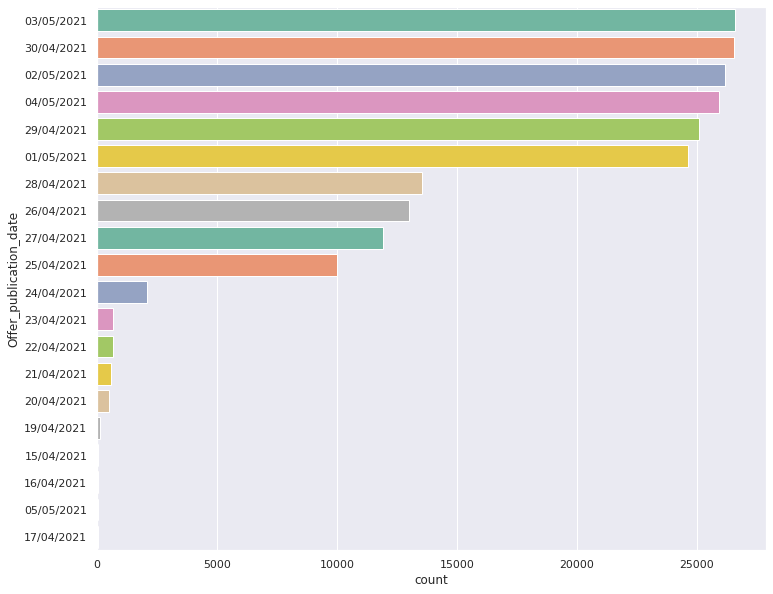

In [ ]:
#Since the count after 19/04/2021 is almost 0, we can safely say that all the offer_publication_date are made in the year 2021
#This is later confirmed by looking at the whole column df_clean['Offer_publication_date']
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
Offer_publication_date_count = sns.countplot(y="Offer_publication_date", data=df_clean, palette="Set2", order=df_clean['Offer_publication_date'].value_counts().index[0:20])

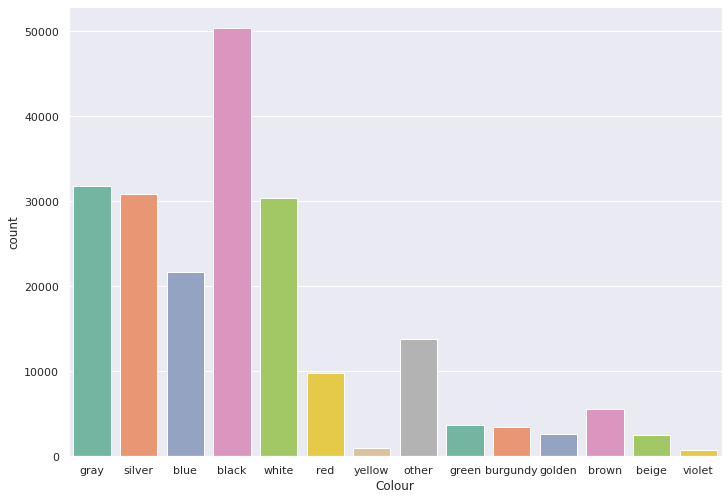

In [ ]:
#About half of our cars are manual cars
sns.set(style="darkgrid")
Transmission_count = sns.countplot(x="Colour", data=df_clean, palette="Set2")

# Applying multivariate data analysis on multiple features to study the relation between them

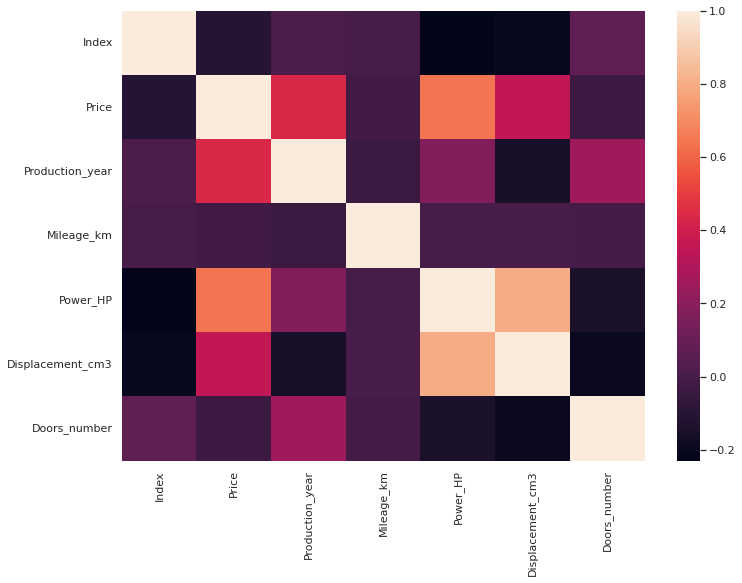

In [ ]:
#This heatmap shows a basic overview of how features are corelated to each other
#We can see that Price is influenced by Power_HP, Displacement_cm3 and Production_year
sns.heatmap(df_clean.corr())

In [ ]:
#How does the condition(usage) of a car determine its price?
#What is the relation between Price, horse_power and car condition?

#Determining the limits for better plotting
df_clean['Price'].max()
df_clean['Power_HP'].max()
df_clean['Price'].mean()
df_clean['Power_HP'].mean()

173.91193336824355

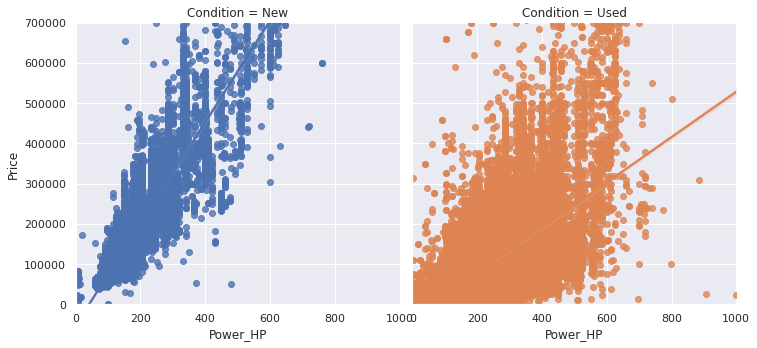

In [ ]:
#Plotting the relation between Price, Power_HP and condition of the car
#This plot shows that new cars that has high horse power tends to sell at a larger price than used cars this is due to the steepness of the blue line
#However, in this dataset we know that the number of used car is a lot higher than the number of new cars, making the plot in orange seem a lot denser at the bottom 
#Whether or not a car is new, having a large horsepower will always make the car much more expensive
plot = sns.lmplot(x="Power_HP", y="Price", col="Condition", hue="Condition", data=df_clean)
plot.set(xlim=(0, 1000), ylim=(0, 700000))

plt.show()

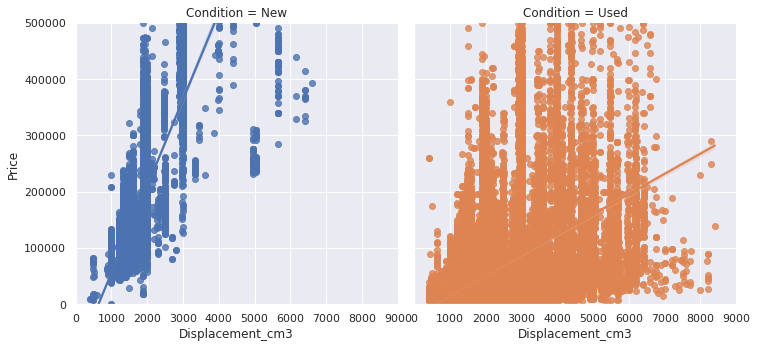

In [ ]:
#This plot compares the Price, Displacement_cm3 and the condition of the car
#It yields to the same result about that regardless of the condition of the car, the more Displacement_cm3 you have, the more a car is expensive
#However, here we have more variance in the Displacement_cm3 due to having double the amount of unique values than before(horsepower was 500 values but here 1200)
#making the linear_regression plot fir poorly
plot = sns.lmplot(x="Displacement_cm3", y="Price", col="Condition", hue="Condition", data=df_clean)
plot.set(xlim=(0, 9000), ylim=(0, 500000))

plt.show()

In [ ]:
# from the above 2 graphs we can say that the condition of the car in this dataset does not have a strong effect in the determining the price of the car
# we did this by comparing the condition of the car with the 2 most correlated features that determines the price (horsepower and Displacement_cm3)

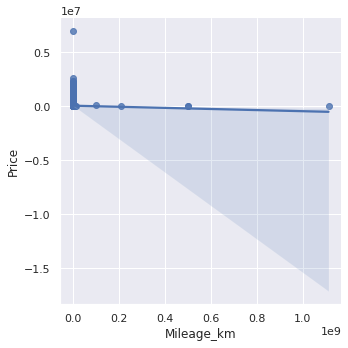

In [ ]:
#The mileage of a car affects the price negatively, meaning the more milage_km a car has, it will reduce its price
#That means that the usage of a car in terms of Mileage_km does have a strong effect on the price unlike the condition which has a small effect
plot = sns.lmplot(x="Mileage_km", y="Price", data=df_clean)

plt.show()

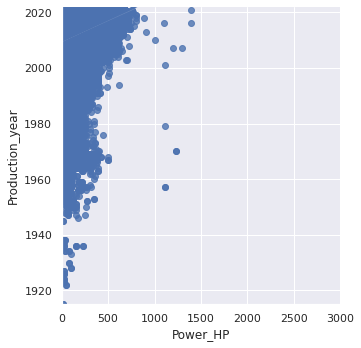

In [ ]:
plot = sns.lmplot(x="Power_HP", y="Production_year", data=df_clean)
plot.set(xlim=(0, 3000), ylim=(1915, 2022))

In [ ]:
#Encoding column to be able to plot more freely
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df_clean['Transmission'])
values = encoder.transform(df_clean['Transmission'])
print("Before Encoding:", list(df_clean['Transmission'][-10:]))
print("After Encoding:", values[-10:])

Before Encoding: ['Manual', 'Manual', 'Automatic', 'Manual', 'Manual', 'Manual', 'Manual', 'Manual', 'Manual', 'Manual']
After Encoding: [1 1 0 1 1 1 1 1 1 1]


In [ ]:
Transmission_encoded = pd.DataFrame(values, columns=['Transmission'])
Transmission_df = df_clean
Transmission_df = Transmission_df.drop('Transmission', axis=1)
Transmission_df = pd.concat([Transmission_df, Transmission_encoded], axis=1)

In [ ]:
Transmission_df.head()

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Type,Doors_number,Colour,Offer_publication_date,Offer_location,Features,Transmission
0,0.0,86200.0,PLN,New,Abarth,595,2021.0,1.0,145.0,1400.0,Gasoline,Front wheels,small_cars,3.0,gray,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[],1.0
1,1.0,43500.0,PLN,Used,Abarth,Other,1974.0,59000.0,75.0,1100.0,Gasoline,Front wheels,coupe,2.0,silver,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[],1.0
2,2.0,44900.0,PLN,Used,Abarth,500,2018.0,52000.0,180.0,1368.0,Gasoline,Front wheels,small_cars,3.0,silver,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air...",0.0
3,3.0,39900.0,PLN,Used,Abarth,500,2012.0,29000.0,160.0,1368.0,Gasoline,Front wheels,small_cars,3.0,gray,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air...",1.0
4,4.0,97900.0,PLN,New,Abarth,595,2021.0,600.0,165.0,1368.0,Gasoline,Front wheels,small_cars,3.0,blue,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa...",1.0


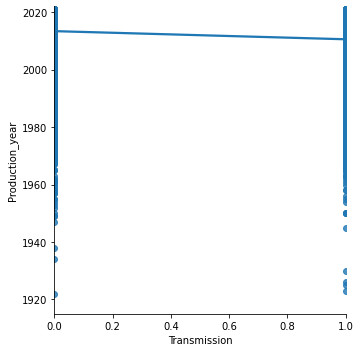

In [ ]:
plot = sns.lmplot(x="Transmission", y="Production_year", data=Transmission_df)
plot.set(xlim=(0, 1), ylim=(1915, 2022))

**Does the price of cars increase over the years?**

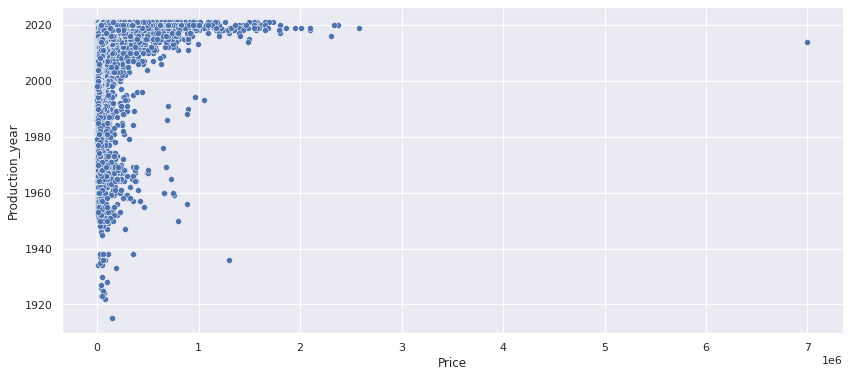

In [ ]:

plt.figure(figsize=(14,6))
sns.scatterplot(x=df_clean['Price'], y=df_clean['Production_year'])
# based on the scatter plot here the prices of cars had severly increased in the last decade


**What is the relation between Price and the vechile_brand?**


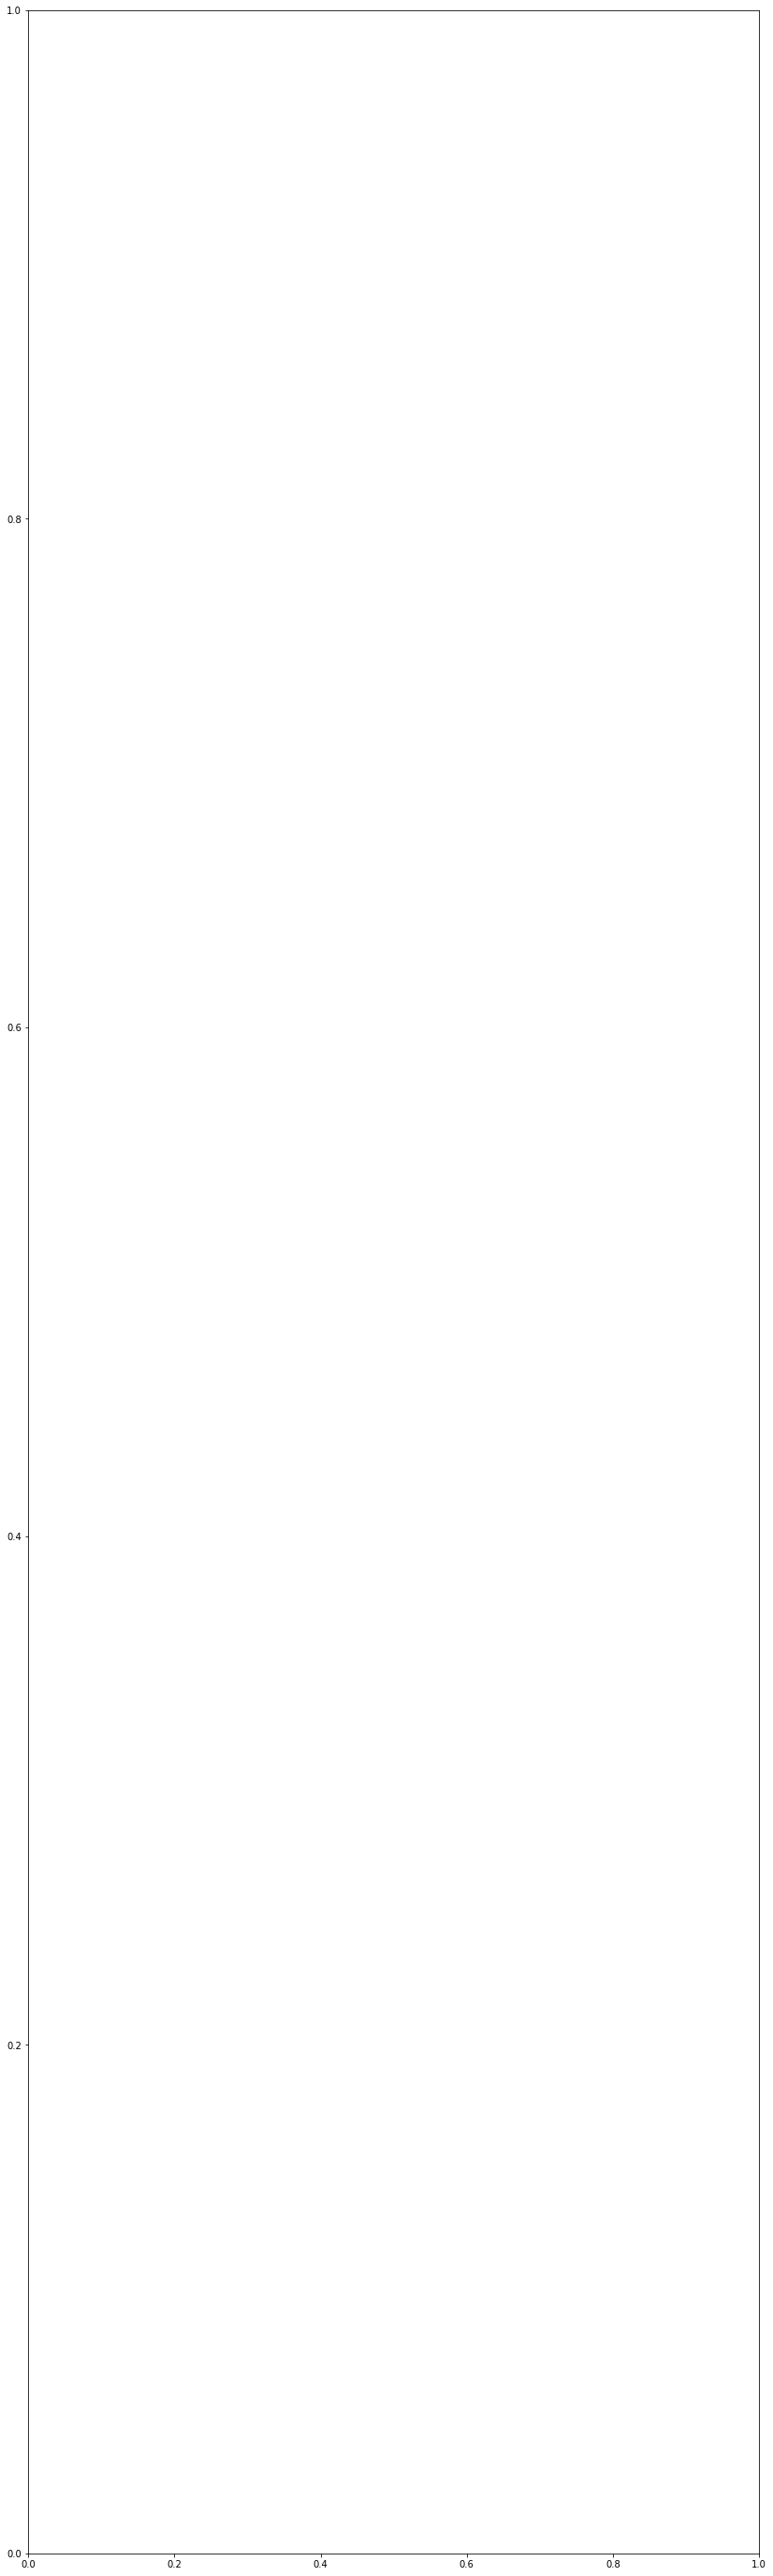

In [108]:
plt.figure(figsize=(14,50))

sns.scatterplot(x=df_clean['Price'], y=df_clean['Vehicle_brand'],hue=df_clean['Colour'])
# We realize that rolls-royce pale-brown  , Mclarn pale brown, all colors in bentley and the green ferrari have the highest prices 
